In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv('data.csv')

In [20]:
df.head()

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
0,261,Rishi,Gupta,919954629666,9.92,5.06,19
1,827,Seema,Singh,919085484267,0.22,2.83,20
2,566,Pooja,Rao,919692747629,4.00,5.78,20
3,431,Vikram,Trivedi,919289900918,3.93,NaN,20
4,688,Rishi,Nair,918510327681,0.34,3.35,22


In [21]:
df.tail()

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
45,869,Suresh,Bose,918940515383,3.91,6.73,22
46,113,Manish,Trivedi,917541370185,3.29,1.57,19
47,414,Rishi,Mehta,919939293191,NaN,9.08,16
48,656,Karan,Jha,918754597430,6.74,4.01,16
49,395,Vikram,Sharma,917342735709,4.62,4.02,19


In [22]:
df.sample(5)

,Roll Number,First Name,Last Name,Mobile Number,CGPA1,CGPA2,age
41,281,Pooja,Mittal,917222526570,9.22,5.90,19
19,699,Vikram,Mittal,918450381983,5.20,2.63,24
46,113,Manish,Trivedi,917541370185,3.29,1.57,19
12,501,Anika,Agarwal,918906573611,1.66,6.82,19
24,627,Vaishnavi,Kumar,919077709031,0.14,NaN,22


In [23]:
df.shape

(50, 7)

In [25]:
df.size

350

In [26]:
df.columns

Index(['Roll Number', 'First Name', 'Last Name', 'Mobile Number', 'CGPA1',
       'CGPA2', 'age'],
      dtype='object')

In [27]:
df.dtypes

Roll Number        int64
First Name        object
Last Name         object
Mobile Number      int64
CGPA1            float64
CGPA2            float64
age                int64
dtype: object

In [28]:
df.info

<bound method DataFrame.info of     Roll Number First Name Last Name  Mobile Number  CGPA1  CGPA2  age
0           261      Rishi     Gupta   919954629666   9.92   5.06   19
1           827      Seema     Singh   919085484267   0.22   2.83   20
2           566      Pooja       Rao   919692747629   4.00   5.78   20
3           431     Vikram   Trivedi   919289900918   3.93    NaN   20
4           688      Rishi      Nair   918510327681   0.34   3.35   22
5           401      Pooja      Bose   918752969300   8.74   7.23   19
6           532  Vaishnavi       Jha   919009969408   5.63   4.38    2
7           774  Vaishnavi     Verma   917407265215   8.35   2.51   23
8           942     Nikita     Mehta   917631350107   0.66   0.50   18
9           660      Divya      Devi   919595059601    NaN   9.66   24
10           32  Vaishnavi    Pandey   918922269173   4.02   4.08   17
11          300      Seema   Agarwal   919811084246   3.35   9.33   16
12          501      Anika   Agarwal   918906

In [29]:
df.describe()

,Roll Number,Mobile Number,CGPA1,CGPA2,age
count,50.000000,5.000000e+01,45.000000,47.000000,50.000000
mean,492.440000,9.185083e+11,5.092444,4.586170,22.780000
std,250.705792,9.131771e+08,3.068496,2.688698,22.994489
min,15.000000,9.170212e+11,0.000000,0.250000,2.000000
25%,288.000000,9.176502e+11,2.920000,2.730000,18.000000
50%,527.500000,9.186161e+11,4.750000,4.080000,19.500000
75%,659.000000,9.192426e+11,8.110000,6.580000,22.750000
max,994.000000,9.199546e+11,9.920000,9.720000,180.000000


In [30]:
df.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            5
CGPA2            3
age              0
dtype: int64

In [32]:
df['CGPA1'].fillna(df['CGPA1'].mean(),inplace=True)


In [34]:
df.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            0
CGPA2            3
age              0
dtype: int64

In [35]:
df['CGPA2'].fillna(df['CGPA2'].mean(),inplace=True)


In [36]:
df.isnull().sum()

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            0
CGPA2            0
age              0
dtype: int64

<Axes: ylabel='age'>

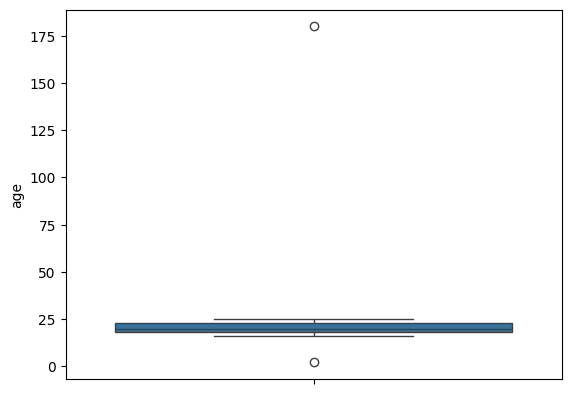

In [39]:
import seaborn as sns
sns.boxplot(y='age',data=df)

In [41]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

18.0
22.75
4.75


In [43]:
outlier=df[(df['age']<(Q1-1.5*IQR))|(df['age']>(Q3+1.5*IQR))]
print(outlier)

    Roll Number First Name Last Name  Mobile Number  CGPA1  CGPA2  age
6           532  Vaishnavi       Jha   919009969408   5.63   4.38    2
27          722  Vaishnavi     Patel   917550452611   9.49   3.29  180


In [45]:
df['age']=df['age'].mask(df['age']> Q3+1.5*IQR,df['age'].mode()[0])
df['age']=df['age'].mask(df['age']< Q1-1.5*IQR,df['age'].mode()[0])

<Axes: ylabel='age'>

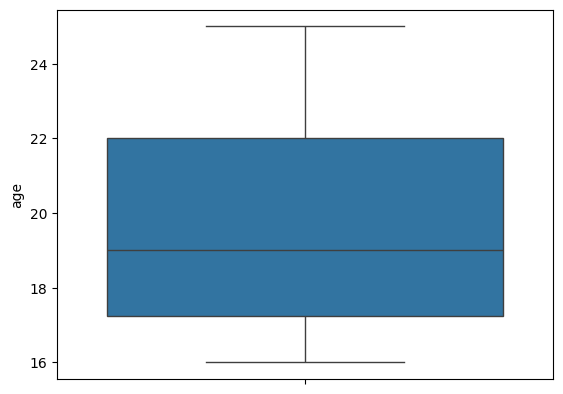

In [46]:
sns.boxplot(y='age',data=df)

In [48]:
from sklearn.preprocessing import PowerTransformer


In [49]:
var=PowerTransformer()

In [51]:
df['age']=var.fit_transform(df['age'].values.reshape(-1,1))